In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import math

from matplotlib import gridspec

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

from imblearn.ensemble import BalancedRandomForestClassifier

sns.set()
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Silence some warnings...
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import data from .csv files
df = pd.read_csv("train.csv", delimiter = ',')

In [4]:
df.head()

,pointid,Salinity_today,Temperature_today,Substrate,Depth,Exposure,Presence
0,1557521,30.467175,6.472158,1.0,-124.810000,972065.250,0
1,893106,5.571699,3.367225,0.0,-6.122131,19108.832,0
2,1326854,6.657795,5.305255,1.0,-162.640000,772179.300,0
3,196477,2.744422,1.934046,0.0,-35.440000,407472.400,0
4,168448,2.797321,2.039138,1.0,-51.250000,408049.120,0


In [5]:
df.describe()

,pointid,Salinity_today,Temperature_today,Substrate,Depth,Exposure,Presence
count,2.626044e+06,2.575550e+06,2.575550e+06,2.626044e+06,2.622603e+06,2.625551e+06,2.626044e+06
mean,1.459260e+06,7.379303e+00,4.474983e+00,9.569923e-01,-6.428228e+01,6.379978e+05,1.904005e-05
std,8.423256e+05,5.543871e+00,1.280778e+00,2.028744e-01,5.364556e+01,2.987994e+05,4.363449e-03
min,2.000000e+00,5.396921e-01,1.157114e+00,0.000000e+00,-5.568000e+02,2.419487e-04,0.000000e+00
25%,7.298498e+05,5.049523e+00,3.473484e+00,1.000000e+00,-8.926000e+01,4.794664e+05,0.000000e+00
50%,1.459524e+06,6.615022e+00,4.849655e+00,1.000000e+00,-5.205000e+01,6.997676e+05,0.000000e+00
75%,2.188710e+06,7.013045e+00,5.561844e+00,1.000000e+00,-2.652000e+01,8.811032e+05,0.000000e+00
max,2.917827e+06,3.168756e+01,6.859754e+00,1.000000e+00,-5.000000e-01,1.130458e+06,1.000000e+00


In [6]:
df.dtypes

pointid                int64
Salinity_today       float64
Temperature_today    float64
Substrate            float64
Depth                float64
Exposure             float64
Presence               int64
dtype: object

In [7]:
# Check how many null values are in the default dataset
df.isnull().sum()

pointid                  0
Salinity_today       50494
Temperature_today    50494
Substrate                0
Depth                 3441
Exposure               493
Presence                 0
dtype: int64

In [8]:
# Check for duplicates
print(df.shape)
print(df.pointid.unique().shape)

(2626044, 7)
(2626044,)


In [9]:
# Check class imbalance
presence_counts = df['Presence'].value_counts()
print(presence_counts) # <--- 99.998%!

0    2625994
1         50
Name: Presence, dtype: int64


In [10]:
df[df['Presence'] == 1]

,pointid,Salinity_today,Temperature_today,Substrate,Depth,Exposure,Presence
15637,2917769,NaN,NaN,1.0,-1.440000,27411.635,1
116559,2917812,6.758904,5.307320,0.0,-8.620000,387998.750,1
119092,2917794,5.364174,4.458898,0.0,-8.380000,457045.030,1
150174,2917773,6.918791,5.192938,0.0,-2.291317,538845.400,1
168291,2917777,6.866458,5.097893,0.0,-1.553837,669519.700,1
241899,2917818,NaN,NaN,1.0,-3.650000,31713.000,1
355015,2917815,NaN,NaN,1.0,-0.700000,25343.000,1
404370,2917801,6.466612,4.615179,0.0,-0.740000,300374.000,1
442576,2917797,6.801412,5.229026,0.0,-2.020000,424549.220,1
525461,2917816,NaN,NaN,1.0,-0.650000,27631.500,1


In [11]:
df['Presence'] = df['Presence'].astype('category')
df['Substrate'] = df['Substrate'].astype('category')

In [12]:
new_df = df.drop(columns = ['pointid', 'Presence', 'Substrate'])
columns = new_df.columns
print(columns)

Index(['Salinity_today', 'Temperature_today', 'Depth', 'Exposure'], dtype='object')


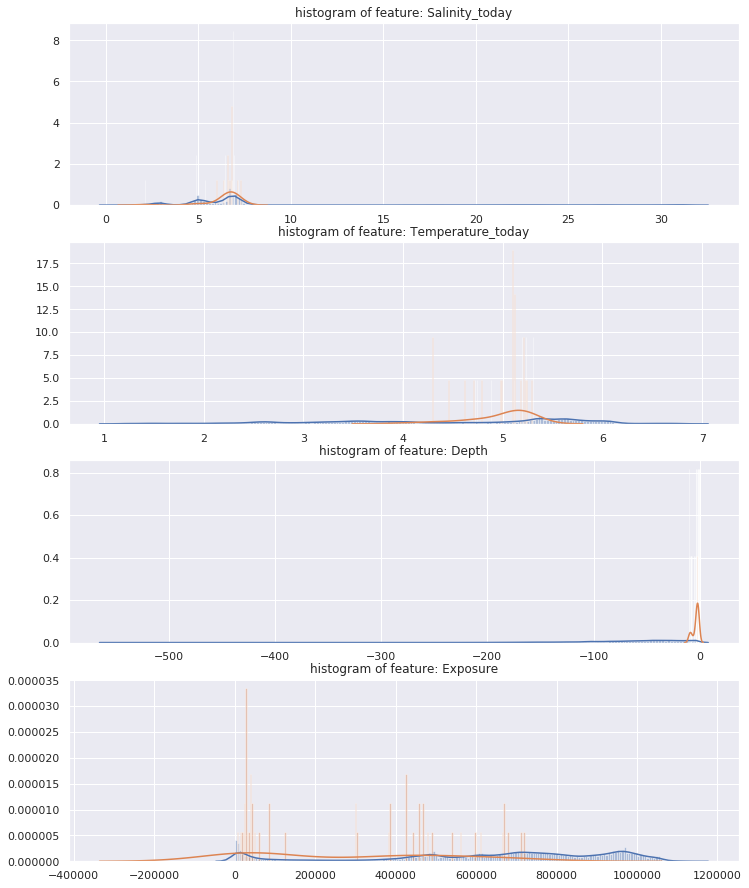

In [12]:
from matplotlib import gridspec
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Presence == 0], bins=200)
    sns.distplot(df[cn][df.Presence == 1], bins=200)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

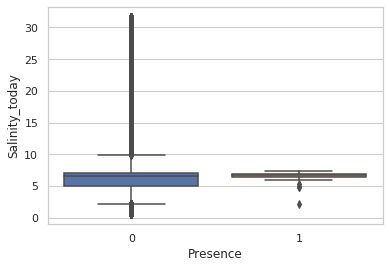

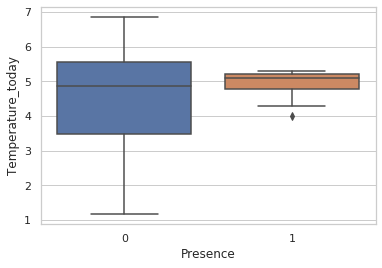

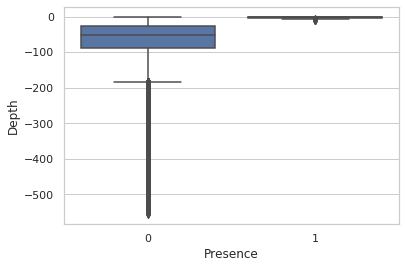

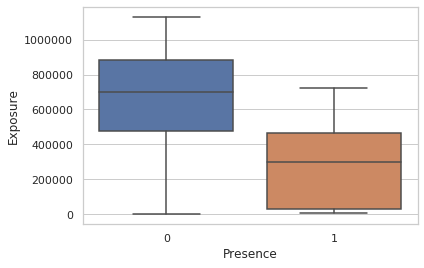

In [13]:
# Helper function for box plots
def plot_box(df, cols, col_x = 'Presence'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=df)
        plt.xlabel(col_x)
        plt.ylabel(col)
        plt.show()

plot_box(df, columns)

Substrate


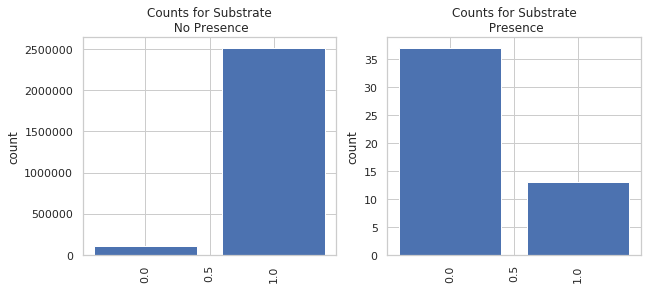

In [14]:
# Check distributions of categorical columns
cat_cols = ['Substrate']

df['dummy'] = np.ones(shape = df.shape[0])
for col in cat_cols:
    print(col)
    counts = df[['dummy', 'Presence', col]].groupby(['Presence', col], as_index = False).count()
    temp = counts[counts['Presence'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['Presence'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n No Presence')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['Presence'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Presence')
    plt.ylabel('count')
    plt.show()
df.drop(columns = ['dummy'], inplace = True)

In [17]:
# NOTE: Missing values of Salinity_today and Temeprature_today go hand in hand. 
df_2 = df[df['Salinity_today'].isnull() & df['Temperature_today'].isnull()]
print(df_2['Salinity_today'].value_counts)

# 3441 missing Depth values, 2956 where both miss
df_2 = df[df['Salinity_today'].isnull() & df['Depth'].isnull()]
print(df_2['Salinity_today'].value_counts)

# 493 missing Exposure, 74 where both miss
df_2 = df[df['Salinity_today'].isnull() & df['Exposure'].isnull()]
print(df_2['Salinity_today'].value_counts)

# 89 lines where only Substrate is available
df_2 = df[df['Salinity_today'].isnull() & df['Exposure'].isnull() & df['Depth'].isnull()]
print(df_2['Salinity_today'].value_counts)

# 0 lines where everything is missing
df_2 = df[df['Salinity_today'].isnull() & df['Exposure'].isnull() & df['Depth'].isnull() & df['Substrate'].isnull()]
print(df_2['Salinity_today'].value_counts)

<bound method IndexOpsMixin.value_counts of 21        NaN
123       NaN
179       NaN
192       NaN
361       NaN
           ..
2625807   NaN
2625834   NaN
2625941   NaN
2625972   NaN
2626016   NaN
Name: Salinity_today, Length: 50494, dtype: float64>
<bound method IndexOpsMixin.value_counts of 192       NaN
425       NaN
3503      NaN
4568      NaN
11228     NaN
           ..
2615841   NaN
2618335   NaN
2618377   NaN
2619001   NaN
2625086   NaN
Name: Salinity_today, Length: 2956, dtype: float64>
<bound method IndexOpsMixin.value_counts of 3503      NaN
89842     NaN
124658    NaN
125676    NaN
153461    NaN
           ..
2554083   NaN
2561786   NaN
2596832   NaN
2614322   NaN
2623290   NaN
Name: Salinity_today, Length: 174, dtype: float64>
<bound method IndexOpsMixin.value_counts of 3503      NaN
89842     NaN
124658    NaN
125676    NaN
153461    NaN
           ..
2461291   NaN
2465276   NaN
2499516   NaN
2538122   NaN
2552860   NaN
Name: Salinity_today, Length: 89, dtype: float64>
<b

In [13]:
# Keep track of the imputed values. For that, we generate a new feature. 
df['Salinity_today_MISS'] = df['Salinity_today'].isnull()
df['Temperature_today_MISS'] = df['Temperature_today'].isnull()
df['Depth_MISS'] = df['Depth'].isnull()
df['Exposure_MISS'] = df['Exposure'].isnull()

In [14]:
df.drop(columns = ['pointid'], inplace = True)

In [15]:
# Prepare the scikit-learn arrays
X = np.array(df.drop(columns=['Presence']))
y = np.array(df['Presence'])

# Split in train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify=y)

In [26]:
# Imputer for the missing values. Using the median value. 
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

In [27]:
df.columns

Index(['Salinity_today', 'Temperature_today', 'Substrate', 'Depth', 'Exposure',
       'Presence', 'Salinity_today_MISS', 'Temperature_today_MISS',
       'Depth_MISS', 'Exposure_MISS'],
      dtype='object')

In [28]:
# Here, we run a very hand-made hyperparameter tuning. 
# We fit the model on the train set and validate it on the validation set
# We pick the parameters that yield the best balanced accuracy for the validation set without overfitting
leafs = [1, 3, 5, 10, 25]
trees = [50, 100, 150, 200, 500, 1000]
feats = [1, 0.5, 'log2', 'sqrt']

leaf_vals = []
tree_vals = []
feat_vals = []
acc1 = []
acc2 = []
for leaf in leafs:
    for tree in trees: 
        for feat in feats:
            clf = BalancedRandomForestClassifier(n_estimators = tree,
                                                 min_samples_leaf = leaf,
                                                 max_features = feat,
                                                 sampling_strategy = 'majority',
                                                 n_jobs = -1,
                                                 random_state=42)
            clf.fit(X_train, y_train)
            y_pred_train = clf.predict(X_train)
            y_pred = clf.predict(X_test)
            leaf_vals.append(leaf)
            tree_vals.append(tree)
            feat_vals.append(feat)
            acc1.append(balanced_accuracy_score(y_train, y_pred_train))
            acc2.append(balanced_accuracy_score(y_test, y_pred))

# Organize the results in a dataframe, and order them
res = np.vstack((tree_vals, leaf_vals, feat_vals, acc1, acc2)).transpose()
results = pd.DataFrame(data=res, columns = ['n_estimators', 
                                            'min_samples_leaf', 
                                            'max_features', 
                                            'balanced_acc_train',
                                            'balanced_acc_val'])
results.sort_values(by = 'balanced_acc_val', ascending = False, inplace = True)

In [29]:
# Check the best values
results.head(10)

,n_estimators,min_samples_leaf,max_features,balanced_acc_train,balanced_acc_val
20,1000,1,1,0.977754550373533,0.977903316262356
16,500,1,1,0.9775732402115247,0.9777567628072719
12,200,1,1,0.9775007729837628,0.9776223259764268
8,150,1,1,0.976893469196597,0.9769726441243605
40,500,3,1,0.9765692138755133,0.9767880098502385
0,50,1,1,0.9763307824869161,0.9764452824788998
44,1000,3,1,0.9762378539242567,0.9764164333735682
36,200,3,1,0.976111107321975,0.97627911163219
1,50,1,0.5,0.9759408803830362,0.9761175566423335
4,100,1,1,0.975872107562964,0.9759646563840763


In [31]:
# Fit and best classifier and predict
clf = BalancedRandomForestClassifier(n_estimators = 500,
                                     min_samples_leaf = 3,
                                     max_features = 1,
                                     sampling_strategy = 'majority',
                                     n_jobs = -1,
                                     random_state=42)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_test)

In [32]:
clf.feature_importances_

array([0.1050018 , 0.14535619, 0.20750804, 0.30710819, 0.15363159,
       0.04186219, 0.039532  , 0.        , 0.        ])

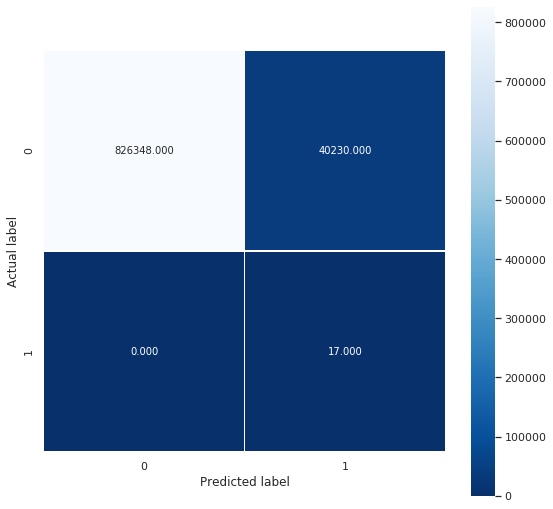

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

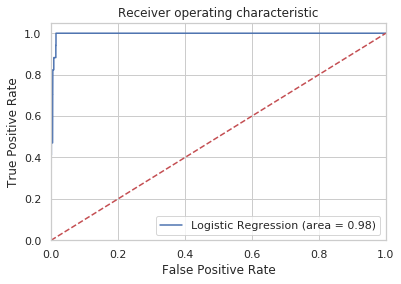

In [35]:
# ROC AUC plots
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
# Dump the model to load it later
import pickle
filename = 'default_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# Dump the imputer to load it later
import pickle
filename = 'default_imputer.pkl'
pickle.dump(imp_mean, open(filename, 'wb'))

In [18]:
# Reload model and imputer
with open('default_model.pkl', 'rb') as f:
     model = pickle.load(f)
with open('default_imputer.pkl', 'rb') as f:
     imputer = pickle.load(f)

In [24]:
# solutions excel file
sol = pd.read_excel(open('solution.xlsx', 'rb'))
# Import test data from .csv files
test_df = pd.read_csv("test.csv", delimiter = ',')

pointid,Presence    object
dtype: object

In [46]:
# Managing the data format to make it readable
vec = np.array(sol['pointid,Presence'])

pointid = []
presence = []
for i in range(len(vec)):
    data = vec[i].split(',')
    pointid.append(int(data[0]))
    presence.append(float(data[1]))

solutions = pd.DataFrame(pointid, columns = ['pointid'])
solutions['Presence'] = presence
test_df = pd.merge(test_df, solutions, on='pointid')

In [51]:
# Redo data manipulation as in the train case

# Keep track of the imputed values. For that, we generate a new feature. 
test_df['Salinity_today_MISS'] = test_df['Salinity_today'].isnull()
test_df['Temperature_today_MISS'] = test_df['Temperature_today'].isnull()
test_df['Depth_MISS'] = test_df['Depth'].isnull()
test_df['Exposure_MISS'] = test_df['Exposure'].isnull()

# Prepare the scikit-learn arrays
X = np.array(test_df.drop(columns=['pointid', 'Presence']))
y = np.array(test_df['Presence'])

# Imputing values as in the train set
X = imputer.transform(X)

In [56]:
# Use the trained model to predict the outputs
y_pred = model.predict(X)

# report balanced accuracy
balanced_accuracy_score(y, y_pred)

0.9772203828990931

In [62]:
from sklearn.metrics import classification_report
print('====== CLASSIFICATION REPORT - TEST SET ======')
print(classification_report(y, y_pred))

====== CLASSIFICATION REPORT - TEST SET ======
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98    291774
         1.0       0.00      1.00      0.00         9

    accuracy                           0.95    291783
   macro avg       0.50      0.98      0.49    291783
weighted avg       1.00      0.95      0.98    291783



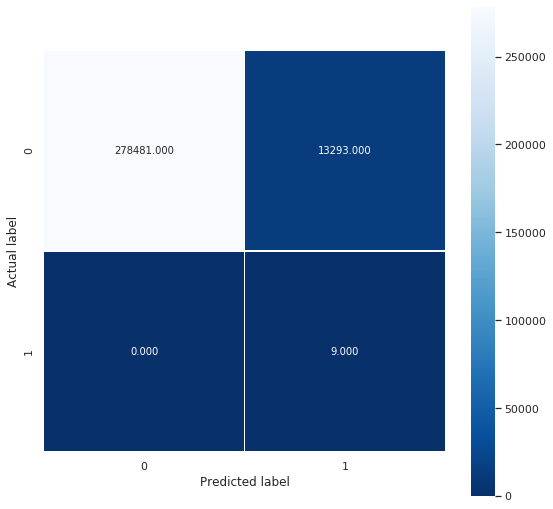

In [53]:
# Check the confusion matrix
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

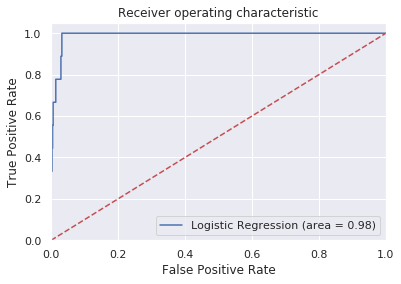

In [54]:
# check ROC AUC plots
logit_roc_auc = roc_auc_score(y, model.predict(X))
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()